In [1]:
import sys
sys.path.insert(0, r'../../../quetzal')

from quetzal.io import  gtfs_importer
from quetzal.model import stepmodel
% matplotlib inline

In [2]:
training_folder = '../../'

In [8]:
sm = stepmodel.read_zip(training_folder + r'model/preparation/road_model.zip')
#sm = stepmodel.read_hdf(training_folder + 'model/merged_after.hdf')

read_hdf: : 100%|██████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 24.02it/s]


# clustering

In [9]:
sm.preparation_clusterize_nodes(300)

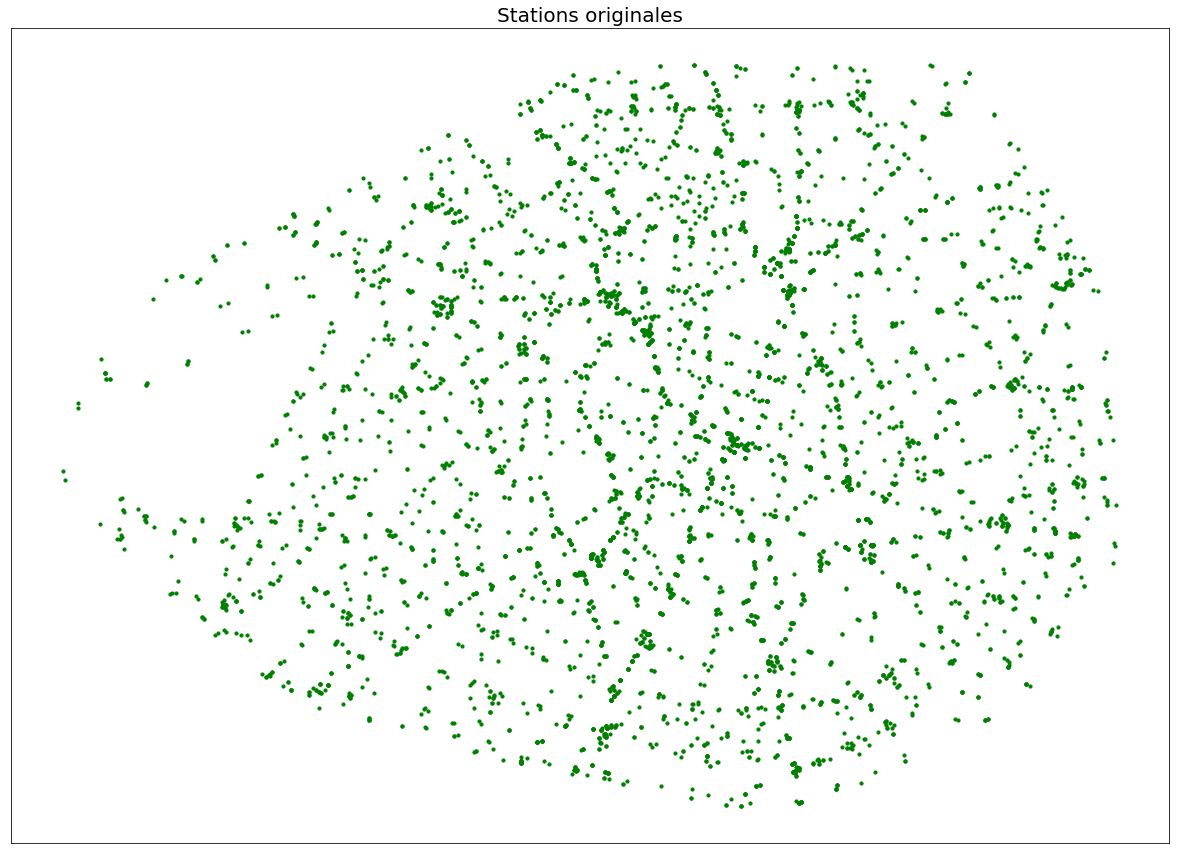

In [56]:
plot = sm.plot('disaggregated_nodes', figsize=[25, 15], markersize=10, color='green')
plot.set_xticks([])
plot.set_yticks([])
plot.set_title("Stations originales", fontsize=20)
fig = plot.get_figure()
fig.savefig('nodes_a.png')

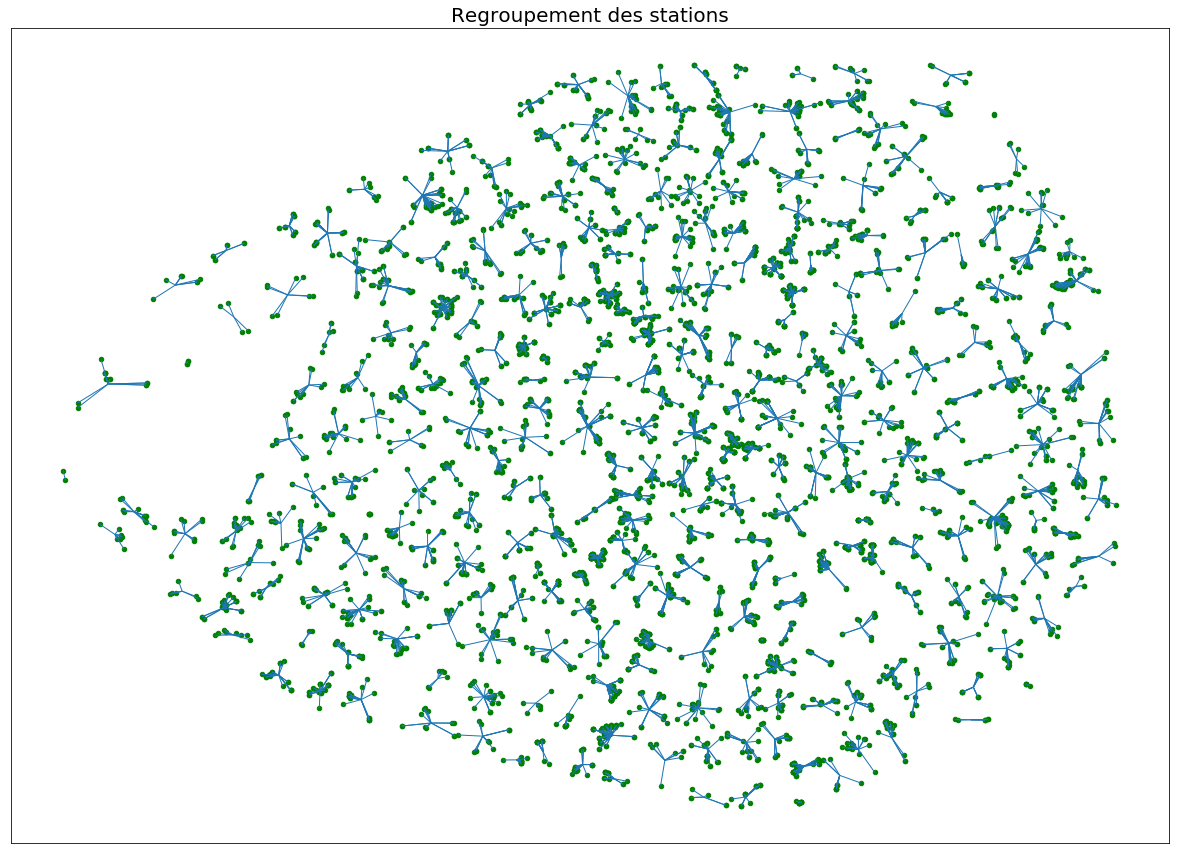

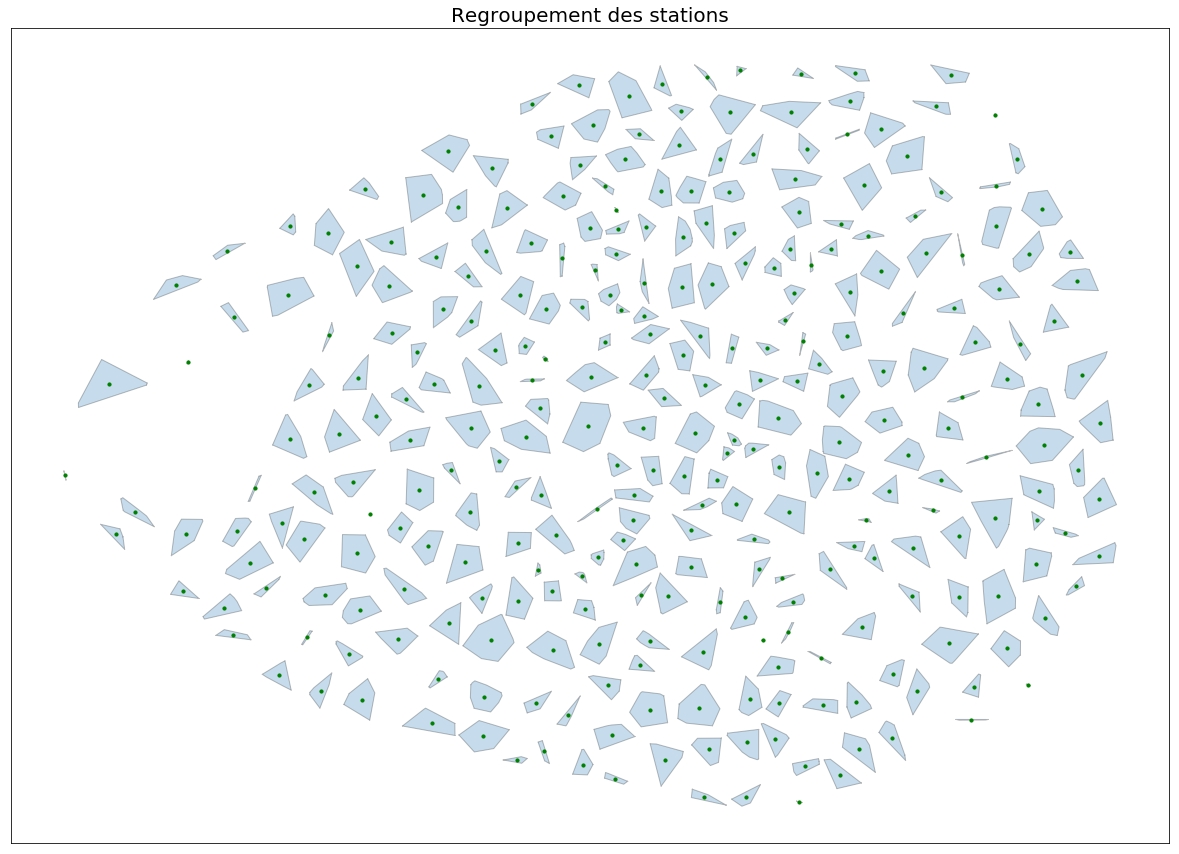

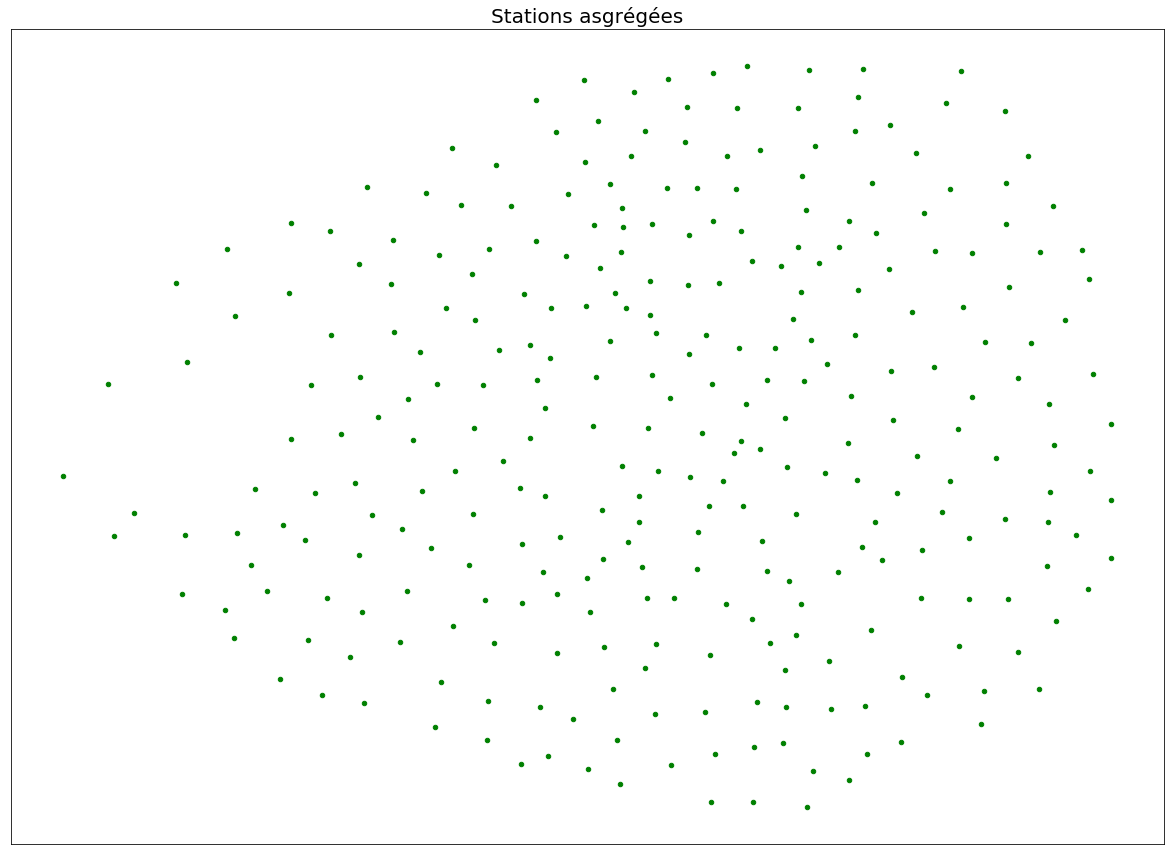

In [62]:
plot = sm.plot('node_parenthood', linewidth=1,
               ax=sm.plot('disaggregated_nodes', figsize=[25, 15], markersize=20, color='green'))
plot.set_xticks([])
plot.set_yticks([])
plot.set_title("Regroupement des stations", fontsize=20)
fig = plot.get_figure()
fig.savefig('nodes_b.png')

plot = sm.plot('nodes', color='green', markersize=10,
               ax=sm.plot('node_clusters', figsize=[25, 15], alpha=0.25, edgecolor='black'))
plot.set_xticks([])
plot.set_yticks([])
plot.set_title("Regroupement des stations", fontsize=20)
fig = plot.get_figure()
fig.savefig('nodes_c.png')

plot = sm.plot('nodes', color='green', markersize=20, figsize=[25, 15])

plot.set_xticks([])
plot.set_yticks([])
plot.set_title("Stations asgrégées", fontsize=20)
fig = plot.get_figure()
fig.savefig('nodes_d.png')

# walkmodel

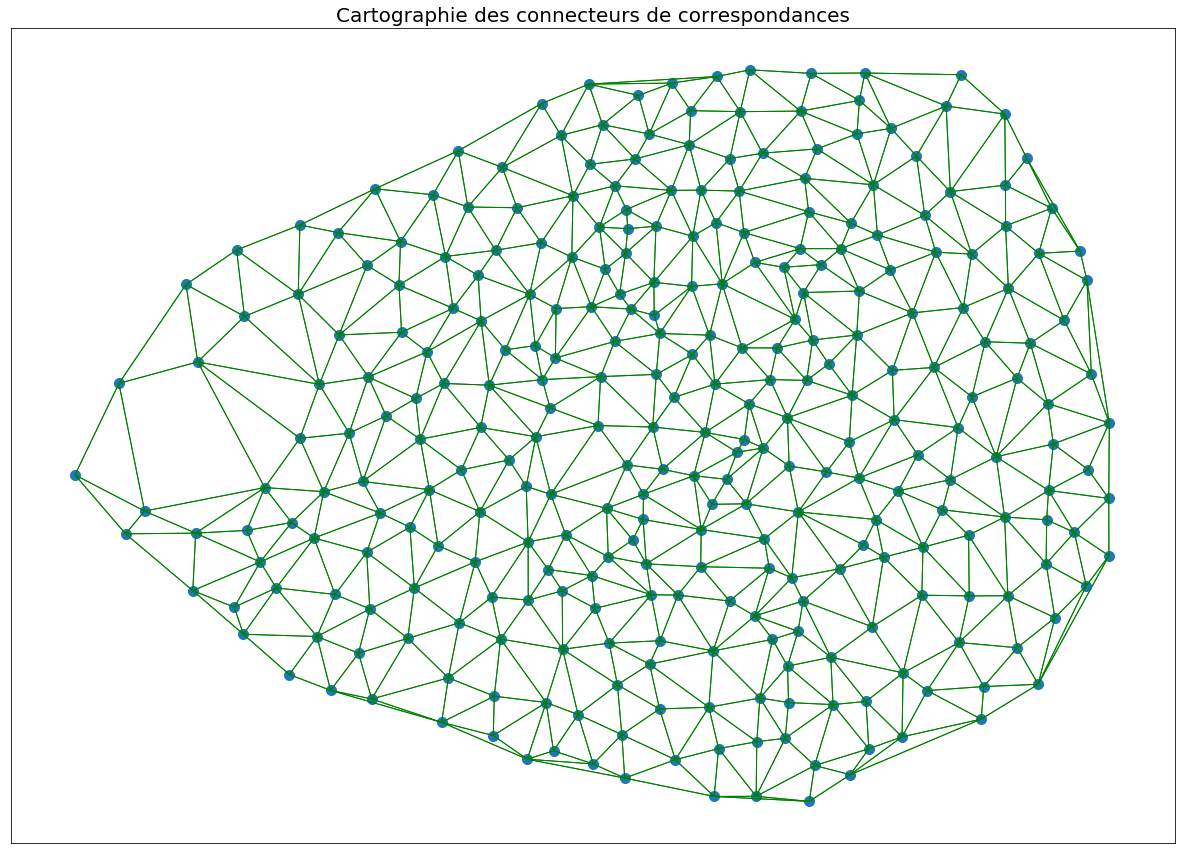

In [71]:
sm.preparation_footpaths(max_length=2000)
plot = sm.plot(
    'footpaths', color='green', linewidth=1,
    ax=sm.plot('nodes', markersize=100,
              ax=sm.plot('zones',alpha=0, figsize=[25, 15]))
)
plot.set_xticks([])
plot.set_yticks([])
plot.set_title("Cartographie des connecteurs de correspondances", fontsize=20)
fig = plot.get_figure()
fig.savefig('walkmodel_a.png')

In [72]:
threshold = 200
sm.preparation_ntlegs(
    short_leg_speed=3,
    long_leg_speed=10,
    threshold=threshold,
    zone_to_transit=True,
    zone_to_road=True,
    n_ntlegs=5
)

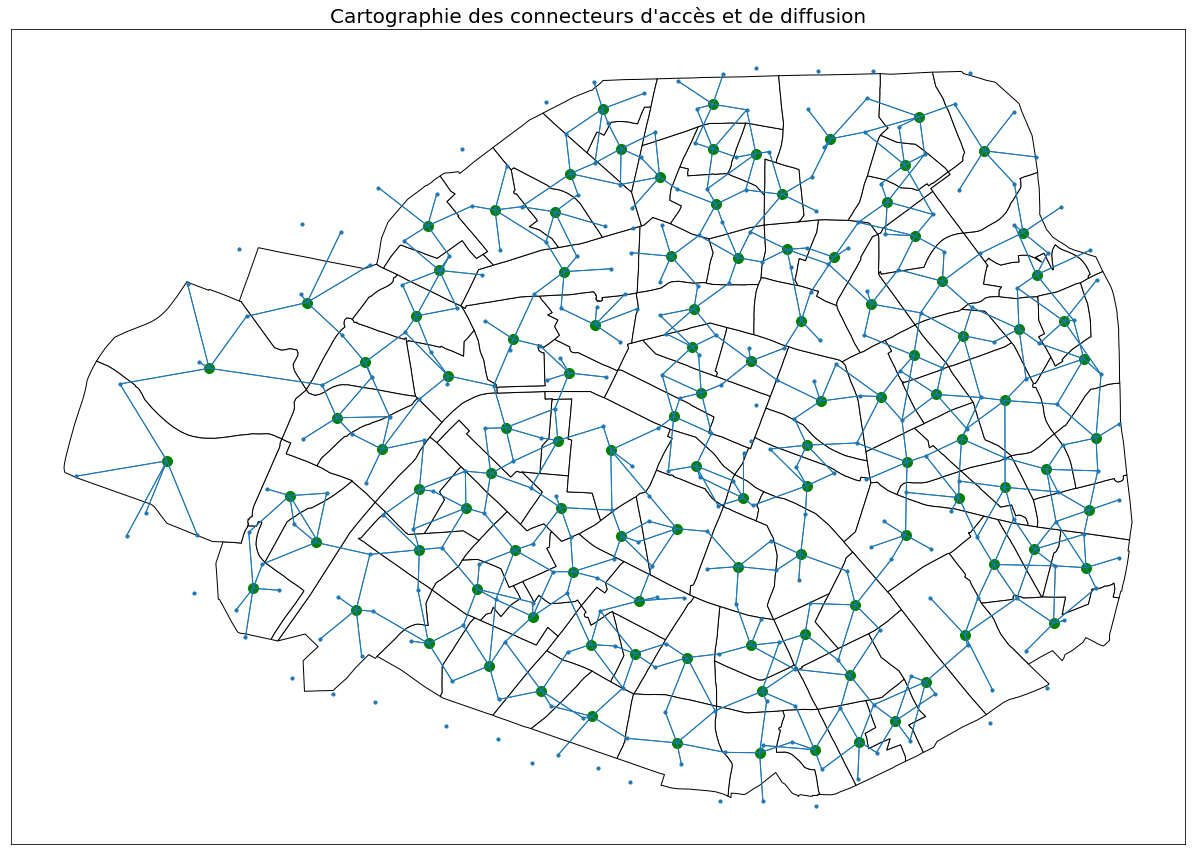

In [77]:
plot = sm.plot('centroids', color='green', markersize=100,
    ax=sm.plot('nodes', markersize=10,
        ax=sm.plot('zone_to_transit', linewidth=1,
                  ax=sm.plot('zones', linewidth=1, alpha=1, edgecolor='black', color='white', 
                            ax=sm.plot('footpaths',  figsize=[25, 15], alpha=0)))
    )
)
plot.set_xticks([])
plot.set_yticks([])
plot.set_title("Cartographie des connecteurs d'accès et de diffusion", fontsize=20)
fig = plot.get_figure()
fig.savefig('walkmodel_b.png')

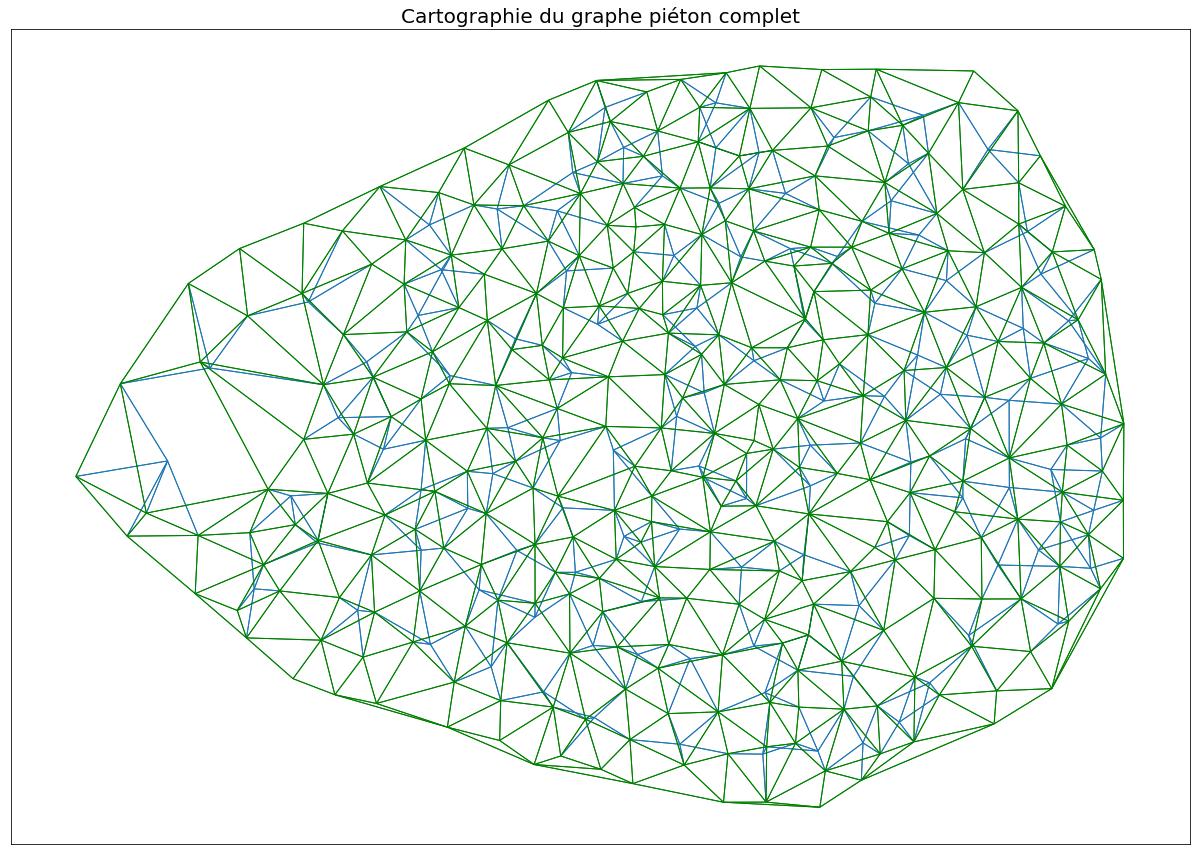

In [79]:
plot = sm.plot(
    'footpaths', color='green', linewidth=1,
    ax=sm.plot('zone_to_transit', linewidth=1,  ax=sm.plot('zones',alpha=0, figsize=[25, 15]) )
)
plot.set_xticks([])
plot.set_yticks([])
plot.set_title("Cartographie du graphe piéton complet", fontsize=20)
fig = plot.get_figure()
fig.savefig('walkmodel_c.png')

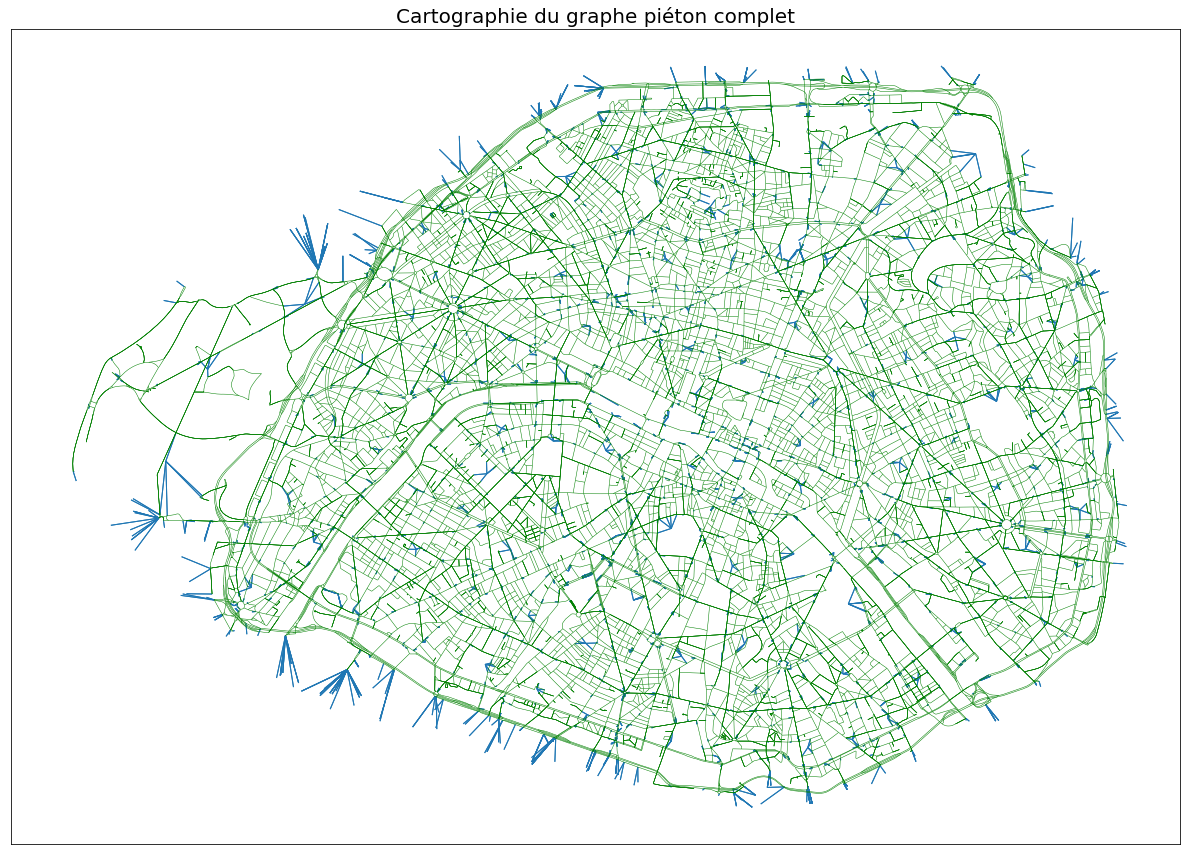

In [86]:
plot = sm.plot('road_links', color='green',linewidth=0.5, ax=sm.plot(
    'road_to_transit',  linewidth=1,
    ax=sm.plot('zone_to_road', linewidth=1,  ax=sm.plot('zones',alpha=0, figsize=[25, 15]) )
))
plot.set_xticks([])
plot.set_yticks([])
plot.set_title("Cartographie du graphe piéton complet", fontsize=20)
fig = plot.get_figure()
fig.savefig('walkmodel_d.png')

In [9]:
sm.to_zip(training_folder + 'model/preparation/walk_model.zip')  

to_hdf(new file): 100%|████████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.84it/s]


In [10]:
projected = sm.change_epsg(epsg=4326, coordinates_unit='degree')
projected.to_json(
    training_folder + 'model/latest', 
    save_jsons=False
 
)  

Reprojecting model from epsg 2154 to epsg 4326: 100%|██████████████████████████████████| 30/30 [00:04<00:00,  6.99it/s]


TypeError: to_json() got an unexpected keyword argument 'save_jsons'

# zone_to_transit monitoring

In [ ]:
ax = sm.zone_to_transit.plot(kind='scatter', x='distance', y='time')
ax.axvline(x=threshold)
ax = sm.zone_to_transit.plot(kind='scatter', x='distance', y='speed')